In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from patsy import dmatrix

In [4]:
np.random.seed(0)
x1 = np.random.rand(5) + 10
x2 = np.random.rand(5) * 10
y = x1 + 2 * x2 + np.random.randn(5)
df = pd.DataFrame(np.array([x1,x2,y]).T, columns=['x1','x2','y'])

In [5]:
df.tail()

,x1,x2,y
0,10.548814,6.458941,23.610739
1,10.715189,4.375872,20.921207
2,10.602763,8.917730,29.199261
3,10.544883,9.636628,29.939813
4,10.423655,3.834415,18.536348


automated bias augmentation is applied

In [6]:
dmatrix('x1',df)

DesignMatrix with shape (5, 2)
  Intercept        x1
          1  10.54881
          1  10.71519
          1  10.60276
          1  10.54488
          1  10.42365
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)

In [7]:
dmatrix('x1 - 1',df)

DesignMatrix with shape (5, 1)
        x1
  10.54881
  10.71519
  10.60276
  10.54488
  10.42365
  Terms:
    'x1' (column 0)

In [10]:
dmatrix('x1 + 0',df)

DesignMatrix with shape (5, 1)
        x1
  10.54881
  10.71519
  10.60276
  10.54488
  10.42365
  Terms:
    'x1' (column 0)

In [11]:
dmatrix('x1 + x2',df)

DesignMatrix with shape (5, 3)
  Intercept        x1       x2
          1  10.54881  6.45894
          1  10.71519  4.37587
          1  10.60276  8.91773
          1  10.54488  9.63663
          1  10.42365  3.83442
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [12]:
dmatrix('x1 + x2 + 0',df)

DesignMatrix with shape (5, 2)
        x1       x2
  10.54881  6.45894
  10.71519  4.37587
  10.60276  8.91773
  10.54488  9.63663
  10.42365  3.83442
  Terms:
    'x1' (column 0)
    'x2' (column 1)

In [15]:
dmatrix('x1 + x2 + x1:x2 - 1',df)

DesignMatrix with shape (5, 3)
        x1       x2      x1:x2
  10.54881  6.45894   68.13417
  10.71519  4.37587   46.88830
  10.60276  8.91773   94.55258
  10.54488  9.63663  101.61711
  10.42365  3.83442   39.96862
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [16]:
dmatrix('x1*x2',df)

DesignMatrix with shape (5, 4)
  Intercept        x1       x2      x1:x2
          1  10.54881  6.45894   68.13417
          1  10.71519  4.37587   46.88830
          1  10.60276  8.91773   94.55258
          1  10.54488  9.63663  101.61711
          1  10.42365  3.83442   39.96862
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [17]:
dmatrix('x1 + np.log(np.abs(x2))' , df)

DesignMatrix with shape (5, 3)
  Intercept        x1  np.log(np.abs(x2))
          1  10.54881             1.86547
          1  10.71519             1.47611
          1  10.60276             2.18804
          1  10.54488             2.26557
          1  10.42365             1.34402
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [18]:
def doubeit(x):
    return 2 * x
dmatrix('doubeit(x1)',df)

DesignMatrix with shape (5, 2)
  Intercept  doubeit(x1)
          1     21.09763
          1     21.43038
          1     21.20553
          1     21.08977
          1     20.84731
  Terms:
    'Intercept' (column 0)
    'doubeit(x1)' (column 1)

In [24]:
dmatrix('center(x1) + standardize(x1) + scale(x2)',df)
# center : remove average
# standardize : remove average and scaling by std
# scale : same with standardize

DesignMatrix with shape (5, 4)
  Intercept  center(x1)  standardize(x1)  scale(x2)
          1    -0.01825         -0.19319   -0.07965
          1     0.14813          1.56828   -0.97279
          1     0.03570          0.37799    0.97458
          1    -0.02218         -0.23480    1.28282
          1    -0.14341         -1.51828   -1.20495
  Terms:
    'Intercept' (column 0)
    'center(x1)' (column 1)
    'standardize(x1)' (column 2)
    'scale(x2)' (column 3)

In [26]:
dmatrix('I(x1+x2) - 1',df)

DesignMatrix with shape (5, 1)
  I(x1 + x2)
    17.00775
    15.09106
    19.52049
    20.18151
    14.25807
  Terms:
    'I(x1 + x2)' (column 0)

In [28]:
dmatrix("x1 + I(x1**2) + I(x1**3) + I(x1**4)", df)

DesignMatrix with shape (5, 5)
  Intercept        x1  I(x1 ** 2)  I(x1 ** 3)   I(x1 ** 4)
          1  10.54881   111.27747  1173.84524  12382.67452
          1  10.71519   114.81528  1230.26750  13182.54925
          1  10.60276   112.41859  1191.94772  12637.93965
          1  10.54488   111.19456  1172.53366  12364.23047
          1  10.42365   108.65258  1132.55698  11805.38301
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'I(x1 ** 2)' (column 2)
    'I(x1 ** 3)' (column 3)
    'I(x1 ** 4)' (column 4)

### encoding categorical variable
- full-rank
    - remove the intercept (bias)
- reduced-rank
    - allocate specific category as reference category
    - that category dummies always is 1

In [29]:
df2 = pd.DataFrame(['a','b','c','d'],columns = ['x3'])
df2

,x3
0,a
1,b
2,c
3,d


In [32]:
dmatrix('x3-1',df2)

DesignMatrix with shape (4, 4)
  x3[a]  x3[b]  x3[c]  x3[d]
      1      0      0      0
      0      1      0      0
      0      0      1      0
      0      0      0      1
  Terms:
    'x3' (columns 0:4)

In [33]:
dmatrix('x3',df2)

DesignMatrix with shape (4, 4)
  Intercept  x3[T.b]  x3[T.c]  x3[T.d]
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
  Terms:
    'Intercept' (column 0)
    'x3' (columns 1:4)

In [34]:
df3 = pd.DataFrame([1,2,3,4],columns=['x4'])
df3

,x4
0,1
1,2
2,3
3,4


In [36]:
dmatrix('C(x4) -1',df3)

DesignMatrix with shape (4, 4)
  C(x4)[1]  C(x4)[2]  C(x4)[3]  C(x4)[4]
         1         0         0         0
         0         1         0         0
         0         0         1         0
         0         0         0         1
  Terms:
    'C(x4)' (columns 0:4)

In [37]:
np.random.seed(0)
x1 = np.random.rand(20) + 10
x2 = np.random.rand(20) * 10
y = x1 + 2 * x2 + np.random.randn(20)
df4 = pd.DataFrame(np.array([x1, x2, y]).T, columns=["x1", "x2", "y"])

In [39]:
df4.tail()

,x1,x2,y
15,10.087129,6.176355,23.217330
16,10.020218,6.120957,20.648235
17,10.832620,6.169340,22.958560
18,10.778157,9.437481,28.757652
19,10.870012,6.818203,24.893321


In [43]:
model2 = sm.OLS.from_formula('y ~ x1 + x2',df4)
model2

In [45]:
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     246.8
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           2.75e-13
Time:                        08:29:00   Log-Likelihood:                -29.000
No. Observations:                  20   AIC:                             64.00
Df Residuals:                      17   BIC:                             66.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4226     10.140      0.140      0.8

- 카테고리 값은 여러개의 다른 상태를 나타내는 값이다. 카테고리 클래스들은 그것이 문자든, 숫자든 간에 라벨에 불과하며 실제로 크기에 의미가 없다는 것에 주의해야 한다.
- 따라서 카테고리 값을 그냥 정수로 쓰면 회귀 분석 모형은 이 값을 크기를 가진 숫자로 인식할 수 있는 위험이 있기 때문에 0과 1 두 가지 값만 가지는 더미 변수의 형태로 변환하여 회귀 분석을 한다.
- 변수의 갯수는 카테고리의 숫자와 같은 수로 증가한다
- 더미 변수를 사용하면 카테고리 변수의 값에 따라 나누어진 여러 그룹의 데이터에 대해 각각 회귀 모형을 사용하는 것과 같다. 다만 이 회귀 모형들은 더미 변수의 사용 방법에 따라서 공통 모수를 가진다.

- first case : y is only dependent on categorical variable x_1
`y_hat = w_1 * d_1 + w_2 * d_2 + w_3 * d_3`
- if apply dummy variable,
    - x1 = A, d1 = 1, d2 = 0, d3 = 0
    - x1 = B, d1 = 0, d2 = 1, d3 = 0
    - x1 = C, d1 = 0, d2 = 0, d3 = 1
- weight of each dummy variable is calculated by mean value from each category
- there is no `constant(intercent,bias)` if we use one-hot-coding in full rank, then we should not take constant cuz, there gonna be non-value.
- if you wanna use const then, reduce one dummy and allocate one of class as every dummy variable is 0.
- prediction model : 
    - `y_hat = w_0 + w_1 * d_1 + w_2 * d_2`
    - x1 = A, d1 = 0, d2 = 0
    - x1 = B, d1 = 1, d2 = 0
    - x1 = C, d1 = 0, d2 = 1
- w_0 = y_A(hat)
- w_1 = y_B(hat) - y_A(hat)
- w_2 = y_C(hat) - y_A(hat)
- statsmodel 패키지의 OLS 명령에서는 카테고리 변수와 상수항이 동시에 존재하면 자동으로 Reduced-Rank 인코딩을 한다. `y ~ C(x1)"`

- dependent variable y depends on categorical variable x_1 and numerical variable x_2 and weight of x_2 is independent with x_1's moving.
- `y_hat = w_1 * d_1 + w_2 + d_2 + w_3 * d_3 + w_4 * x_2`
- `"y ~ C(x1) + x2"`

- dependent variable y depends on categorical variable x_1 and numerical variable x_2 but in this case, weight of x_2 is impacted on x_1's moving.
- `y_hat = f(x_1) + w(x_1) * x_2`
- `y_hat = w_1*d_2 + w_2*d_2 + w_3*d_3 + w_4*d1**x_2 + w_1*d_2*x_2 + w_1*d_3*x_2`
- `y ~ C(x1) + C(x1):x2"`

In [46]:
df = sm.datasets.get_rdataset("nottem").data

In [47]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df["date0"] = df[["time"]].applymap(convert_partial_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"]
df.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


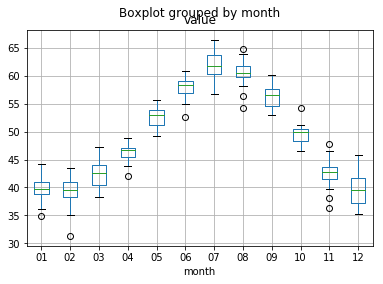

In [51]:
import matplotlib.pylab as plt
df.boxplot("value", "month")
plt.show()

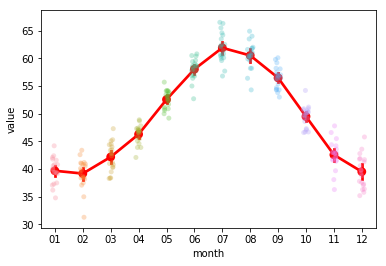

In [52]:
sns.stripplot(x="month", y="value", data=df, jitter=True, alpha=.3)
sns.pointplot(x="month", y="value", data=df, dodge=True, color='r')
plt.show()

In [54]:
model = sm.OLS.from_formula('value ~ C(month) + 0',df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          2.96e-125
Time:                        08:48:30   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [57]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
# dfX_boston = dfX0_boston.copy()
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [58]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        08:50:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [60]:
df_boston.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [62]:
model = sm.OLS.from_formula('MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS+ RAD + TAX + PTRATIO + B + LSTAT + 0',df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        08:52:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4911      5.104      7.149   